# Kaggle Competition과 ML 알고리즘을 이용한 Holistic Comparative Evaluation Study
## 황석현

### 활용한 데이터: Kaggle Competition: Walter Reade, Ashley Chow. (2023). Binary Classification with a Software Defects Dataset (train.csv). https://kaggle.com/competitions/playground-series-s3e23
### 발굴, 분석하고자 하는 목적: 코드에 관한 다양한 feature을 활용하여, 이 코드가 결함이 있는지 없는지 판단할 것이다.
### 링크에는 train data와 test data가 존재한다.
### 그러나 test  data에는 defects(정답)이 존재하지 않기 때문에, Kaggle에 제출하지 않는 이상, 성능을 평가하기 어렵다.
### train data가 충분히 큰 이유로, train data를 다시 train과 test data로 나누어서 진행하겠다.

In [1]:
from __future__ import print_function
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Lasso , LassoCV, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler ,RobustScaler
from sklearn.tree import DecisionTreeClassifier
import time


# Accuracy Metrics
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os


# KNN 
from sklearn.neighbors import KNeighborsClassifier

# NB
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# SVM
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data 불러오기

In [2]:
data = pd.read_csv("train.csv")
data = data.drop(columns =["id"],axis=1)
data['defects'] = data['defects'].map({True: 1, False: 0})

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loc                101763 non-null  float64
 1   v(g)               101763 non-null  float64
 2   ev(g)              101763 non-null  float64
 3   iv(g)              101763 non-null  float64
 4   n                  101763 non-null  float64
 5   v                  101763 non-null  float64
 6   l                  101763 non-null  float64
 7   d                  101763 non-null  float64
 8   i                  101763 non-null  float64
 9   e                  101763 non-null  float64
 10  b                  101763 non-null  float64
 11  t                  101763 non-null  float64
 12  lOCode             101763 non-null  int64  
 13  lOComment          101763 non-null  int64  
 14  lOBlank            101763 non-null  int64  
 15  locCodeAndComment  101763 non-null  int64  
 16  un

In [4]:
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,1
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,0


In [5]:
string_features = data.select_dtypes(include=['O']).columns
data[string_features] = data[string_features].replace('?',np.nan)

for feature in string_features:
    data[feature] = data[feature].astype(float)

In [6]:
##결측치가 존재하는지 확인
data.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [7]:
skew = pd.DataFrame(data.skew())
skew.columns=['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
loc,11.818912,True
v(g),14.258631,True
ev(g),6.513498,True
iv(g),28.209964,True
n,9.908514,True
v,15.959869,True
l,1.903337,True
d,5.618081,True
i,4.859743,True
e,47.676446,True


In [8]:
binary_features = [col for col in data.columns if data[col].nunique() <= 2 and data[col].dtype != 'object']
continuous_features = [col for col in data.columns if data[col].dtype != 'object' and col not in binary_features]

In [9]:
data_copy=data.copy()

In [10]:
ft=FunctionTransformer(func=np.log1p)
data_copy[continuous_features]=ft.fit_transform(data_copy[continuous_features])
data_copy.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,3.135494,1.386294,0.693147,1.098612,4.110874,5.633467,0.058269,3.023347,2.724580,8.603332,...,2.890372,0.693147,0.693147,0.0,2.833213,2.302585,3.663562,3.135494,1.791759,0
1,2.708050,1.098612,0.693147,1.098612,3.496508,5.025655,0.131028,2.079442,3.096030,6.843441,...,2.484907,0.000000,0.693147,0.0,2.484907,2.484907,2.944439,2.708050,1.386294,0
2,2.484907,1.098612,0.693147,1.098612,3.828641,5.291544,0.104360,2.202765,3.168003,7.470230,...,2.197225,0.000000,0.693147,0.0,2.564949,2.484907,3.367296,2.890372,1.386294,0
3,2.197225,0.693147,0.693147,0.693147,3.178054,4.553982,0.173953,1.832581,2.937043,6.162599,...,1.609438,0.000000,1.098612,0.0,2.197225,1.945910,2.833213,2.079442,0.693147,1
4,2.484907,1.098612,0.693147,1.098612,2.890372,4.126166,0.165514,1.891605,2.598235,5.904462,...,2.079442,0.000000,1.098612,0.0,2.079442,1.945910,2.397895,2.397895,1.386294,0


In [11]:
skew = pd.DataFrame(data_copy.skew())
skew.columns=['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
loc,0.508272,False
v(g),0.858859,True
ev(g),1.703185,True
iv(g),1.188681,True
n,-1.045126,False
v,-1.369203,False
l,1.531066,True
d,-0.732313,False
i,-1.808835,False
e,-1.098970,False


#### skew값이 아까보다 줄어든 것을 확인할 수 있다

### Train data와 Test data split 하자

In [12]:
data_train, data_test = train_test_split(data, test_size=0.1, random_state=42)

In [13]:
data_train['defects'].value_counts()

0    70838
1    20748
Name: defects, dtype: int64

In [14]:
data_test['defects'].value_counts()

0    7861
1    2316
Name: defects, dtype: int64

In [15]:
y_col = 'defects'
feature_cols = [x for x in data_train.columns if x != y_col]
X_train = data_train[feature_cols]
y_train = data_train[y_col]

In [16]:
feature_cols = [x for x in data_test.columns if x != y_col]
X_test = data_test[feature_cols]
y_test = data_test[y_col]

In [17]:
X_test

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
35956,21.0,3.0,1.0,3.0,71.0,355.00,0.10,10.50,34.29,3850.00,...,213.89,17,0,2,0,14.0,18.0,43.0,28.0,5.0
60927,29.0,4.0,1.0,2.0,67.0,315.78,0.08,12.79,27.54,4162.24,...,231.24,17,4,4,2,15.0,17.0,42.0,29.0,7.0
79918,42.0,11.0,9.0,5.0,165.0,872.80,0.05,21.72,49.79,26903.76,...,1494.65,33,1,4,0,17.0,29.0,96.0,69.0,21.0
50078,8.0,1.0,1.0,1.0,7.0,19.65,0.33,3.00,6.55,58.95,...,3.28,3,0,2,0,6.0,1.0,6.0,1.0,1.0
44080,5.0,1.0,1.0,1.0,14.0,46.51,0.33,3.00,15.50,139.52,...,7.75,3,0,0,0,5.0,5.0,8.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74384,16.0,5.0,3.0,2.0,47.0,215.49,0.08,13.20,15.44,2868.91,...,159.68,11,0,3,0,14.0,10.0,28.0,18.0,9.0
96889,11.0,2.0,1.0,1.0,22.0,89.92,0.20,5.00,17.51,466.67,...,25.93,9,0,0,0,10.0,7.0,15.0,7.0,3.0
30725,74.0,9.0,8.0,6.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0,0,0,0,0.0,0.0,0.0,0.0,17.0
59800,56.0,8.0,1.0,6.0,148.0,771.00,0.03,32.34,24.10,25372.20,...,1409.57,42,1,11,0,21.0,17.0,96.0,52.0,15.0


### NN, NB, SVM, DT 를 간단하게 구현해보고 정확성을 확인한 후 , 개선해보자

# 1. KNN

### 1. K의 숫자를 변경하면서 성능을 개선할 수 있다.
### 2. distance measure 방법을 변경해보면서 성능을 개선할 수 있다.

In [18]:
def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [19]:
# KNN K값 바꿔가면서 적용
score_list = list()

knn = KNeighborsClassifier(n_neighbors=2)
knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
KNN_score = accuracy(y_test, y_pred)
print(KNN_score)

0.7804854082735581


# 2.NB

### binary classification이기 때문에 bernoulli를 우선적으로 baseline으로 적용합니다.

### 'gaussian', 'bernoulli', 'multinomial'의 3가지 모델을 비교하여 best model을 찾을 것이다.

In [20]:
# 3개의 모델을 각각 적용
NB = BernoulliNB(alpha = 5.0)

NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)

NBscore = accuracy(y_test, y_pred)

In [21]:
NBscore

0.770069765156726

# 3.SVM

### Parameter을 조정하고, gamma값, C값 iteration 값 등을 변경해가며 성능을 개선할 수 있다.
### SVC를 진행하려면 Scaling을 진행해야한다. 이러한 이유로 위에서 Scaling을 진행했다.

In [ ]:
SVC_Gaussian = SVC(gamma='scale', max_iter= 1000)
SVC_Gaussian.fit(X_train, y_train)
y_pred = SVC_Gaussian.predict(X_test)
SVCscore = accuracy(y_test, y_pred)

c:\Python38\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [22]:
columns = X_train.columns
scaler = RobustScaler()
# scaler = MinMaxScaler()
trainingset = X_train
testset = X_test
trainingset[columns] = scaler.fit_transform(trainingset[columns])
testset[columns] = scaler.transform(testset[columns])
X_train = trainingset
X_test = testset

C:\Users\jimmy0505\AppData\Local\Temp\ipykernel_15344\2122400347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingset[columns] = scaler.fit_transform(trainingset[columns])
C:\Users\jimmy0505\AppData\Local\Temp\ipykernel_15344\2122400347.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testset[columns] = scaler.transform(testset[columns])


In [30]:
SVC_Gaussian = SVC(gamma='scale', max_iter= 1000)
SVC_Gaussian.fit(X_train, y_train)
y_pred = SVC_Gaussian.predict(X_test)
SVCscore = accuracy(y_test, y_pred)

c:\Python38\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [31]:
SVCscore

0.21813894074874718

# 4.DT
### GridSearch를 이용하여 max_depth, max_features의 최적 조합을 탐색할 수 있다.

In [23]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
dt.tree_.node_count, dt.tree_.max_depth

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

DTscore = accuracy(y_test, y_test_pred)
DTscore

0.7210376338803184

In [32]:
scores = [[KNN_score, NBscore, SVCscore, DTscore]]
col = ['KNN','NB', 'SVM', 'DT']
ind = ['BASELINE']
df = pd.DataFrame(scores, columns=col, index=ind)
df

,KNN,NB,SVM,DT
BASELINE,0.780485,0.77007,0.218139,0.721038


SVM의 점수가 낮게 나온 이유 Reasoning
매개변수 튜닝의 필요성: SVM은 커널 함수와 규제 매개변수(C, gamma 등)를 튜닝해야 할 수 있습니다. 올바른 매개변수 설정이 중요하며, 이를 위해 교차 검증과 같은 기법을 사용하여 최적의 매개변수를 찾아야 할 수 있다.

데이터의 불균형: 클래스 간 데이터의 불균형이 있을 경우 SVM은 더 작은 클래스에 대해 성능이 낮을 수 있습니다. 이 경우에는 데이터 리샘플링이나 클래스 가중치 조정과 같은 방법으로 불균형을 처리할 필요가 있을 수 있습니다.

## 1. Best KNN 찾기

In [33]:
score_list = list()

MANHATTAN_DIST = 1
EUCLIDEAN_DIST = 2

distance_measure = {
    'manhattan': MANHATTAN_DIST,
    'euclidean': EUCLIDEAN_DIST
    }

for label,dist_measure in distance_measure.items():
    for k in range(1, 21):
        
        knn = KNeighborsClassifier(n_neighbors=k, p=dist_measure)
        knn = knn.fit(X_train, y_train)
        
        y_pred = knn.predict(X_test)
        score = accuracy(y_test, y_pred)
        
        score_list.append((label,k,score))
    
score_df = pd.DataFrame(score_list, columns=['label','k', 'accuracy'])

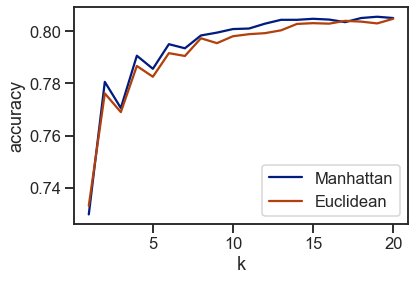

In [34]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

manhattan_score_df = score_df[score_df['label'] =='manhattan']
euclidean_score_df = score_df[score_df['label'] =='euclidean']

plt.plot(manhattan_score_df['k'],manhattan_score_df['accuracy'],label='Manhattan')
plt.plot(euclidean_score_df['k'],euclidean_score_df['accuracy'],label='Euclidean')

plt.xlabel('k')
plt.ylabel('accuracy')

plt.legend()

plt.show()

In [35]:
score_df[score_df.accuracy == score_df.accuracy.max()]

,label,k,accuracy
18,manhattan,19,0.805542


In [36]:
knn = KNeighborsClassifier(n_neighbors=19, p=1)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7861
           1       0.62      0.38      0.47      2316

    accuracy                           0.81     10177
   macro avg       0.73      0.66      0.68     10177
weighted avg       0.79      0.81      0.79     10177



In [37]:
Best_KNN_score = score_df.accuracy.max()
print(Best_KNN_score)

0.8055419082244276


KNN 분석에서 Manhattan distance가 Euclidean distance보다 더 나은 성능을 보였고, K 값의 증가에 따라 정확도가 상승하였다는 것을 확인했습니다.
Manhattan distance를 사용하였을 때 Euclidean distance를 사용했을 때 보다 전반적으로 더 나은 성능을 보였으며, k가 19일때 accuracy가 가장 높았습니다.

Manhattan distance는 두 점 사이의 거리를 측정할 때 좌표상의 각 축에 대해 수직 방향으로 거리를 계산하는 반면, Euclidean distance는 직선 거리를 의미합니다. 때때로 데이터가 공간에서 더 많은 특징을 갖고 있을 때 Manhattan distance가 더 좋은 결과를 보일 수 있습니다. 이는 데이터의 특성에 따라 다르며, 이 경우에는 Manhattan distance가 더 적합한 metric으로 보입니다.

K 값이 작을 때(여기서는 1) 모델이 너무 복잡해져서 훈련 데이터에 과적합되는 경향이 있습니다. 따라서 이 경우에는 새로운 데이터에 대한 일반화 능력이 낮아질 수 있습니다. 이것이 1일 때 낮은 정확도를 설명할 수 있습니다.

K 값이 증가함에 따라 모델의 복잡성이 감소하고, 이웃들의 다양성이 더 많이 반영되기 때문에 일반화 능력이 향상될 수 있습니다. 여기서는 K가 19일 때 가장 높은 정확도를 보여줬으며, 이는 주어진 데이터셋에서 더 많은 이웃을 고려할 때 모델의 성능이 향상되었음을 시사합니다.

# 2. Best NB 찾기

In [38]:
Best_NBscore = 0
models = {
    'Bernoulli': BernoulliNB,
    'Gaussian': GaussianNB,
}
# Parameter를 바꿔가며 적용
params = {
    'Bernoulli': {'alpha': [1e-9, 0.1, 0.5, 1.0]},
    'Gaussian': {'var_smoothing': [0.0, 0.5, 1.0]},
}

score = {}
best_estimator = {}
for key, model in models.items():
    GR = GridSearchCV(model(), param_grid=params[key], scoring='accuracy', n_jobs=-1)
    GR = GR.fit(X_train, y_train)
    y_pred = GR.predict(X_test)
    score[key] = accuracy(y_test, y_pred)
    score[key + '_classification_report'] = classification_report(y_test, y_pred)

    best_estimator[key] = GR.best_estimator_

In [39]:
for key,value in score.items():
    print(f'[{key}] \n{value}')

[Bernoulli] 
0.627689888965314
[Bernoulli_classification_report] 
              precision    recall  f1-score   support

           0       0.85      0.63      0.72      7861
           1       0.33      0.63      0.44      2316

    accuracy                           0.63     10177
   macro avg       0.59      0.63      0.58     10177
weighted avg       0.73      0.63      0.66     10177

[Gaussian] 
0.7987619141200747
[Gaussian_classification_report] 
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7861
           1       0.63      0.29      0.39      2316

    accuracy                           0.80     10177
   macro avg       0.72      0.62      0.64     10177
weighted avg       0.78      0.80      0.77     10177



In [40]:
best_estimator

{'Bernoulli': BernoulliNB(alpha=1e-09),
 'Gaussian': GaussianNB(var_smoothing=0.0)}

In [41]:
Best_NBscore = score['Gaussian']
Best_NBscore

0.7987619141200747

NB(Naive Bayes) 분석에서 RobustScaler를 적용하고 Bernoulli와 Gaussian 알고리즘을 사용하여 실험을 진행하였으며, Gaussian 알고리즘이 더 높은 정확도를 보였습니다. 

또한, GridSearch를 사용하여 최적의 파라미터를 탐색한 결과 GaussianNB의 var_smoothing이 0.0일 때 가장 높은 정확도를 보였습니다.

GaussianNB와 BernoulliNB를 비교했을 때, 데이터의 분포나 특성에 따라 Gaussian 알고리즘이 더 나은 결과를 보이는 경우가 많습니다. 주어진 데이터셋에서도 Gaussian 알고리즘이 Bernoulli 알고리즘보다 훨씬 높은 정확도를 보였습니다. 

이는 이 데이터가 연속적인 특성을 가지고 있거나, Gaussian 분포를 따른다고 가정할 수 있는 경우였기 때문으로 보여집니다.


# 3. Best SVM 찾기

In [ ]:
Cs = [0.001, 0.01,.1, 1, 5, 10]

for C in Cs:
    LSVC = LinearSVC(C=C, max_iter=10000)
    LSVC.fit(X_train, y_train)
    y_pred = LSVC.predict(X_test)
    score = accuracy(y_test, y_pred)
    print(f"C = {C}, score : ", score)


c:\Python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 0.001, score :  0.7995480003930432


c:\Python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 0.01, score :  0.8000393043136484


c:\Python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 0.1, score :  0.8008253905866168


c:\Python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 1, score :  0.802790606269038


c:\Python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 5, score :  0.8048540827355802
C = 10, score :  0.8064262552815171


c:\Python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [42]:
Best_LSVCscore=0.8064262552815171

다음 테스트는 RBFKernel 방식을 이용한 SVC 알고리즘을 적용해 보았습니다.

RBF 방식에는 2가지 매개변수(C, gamma)를 적용할 수 있습니다.

C : 모든 SVM에 적용되는 매개변수로써, Regularization의 기능을 수행합니다. c 값이 크면, decision boundary와의 margin이 작아야 하고, c 값이 작으면 decision boundary와의 margin이 큰 것이 허용됩니다.

gamma : 하나의 트레이닝 셋이 얼마나 영향을 미칠지를 결정하는 변수입니다. 

RBF 커널 방식에서 가장 효과적인 (c, gamma) 값을 찾습니다.


In [ ]:
Cs = [0.001, 0.01,.1, 1, 2, 3, 4, 5, 10, 15, 20]
scores = []

for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma='scale', C=C, class_weight='balanced')
    SVC_Gaussian.fit(X_train, y_train)
    y_pred = SVC_Gaussian.predict(X_test)
    score = accuracy(y_test, y_pred)
    scores.append((score, C))
    print(f"C is {C}, score : {score}")


C is 0.001, score : 0.7926697455045691
C is 0.01, score : 0.7758671514198683
C is 0.1, score : 0.768399331826668
C is 1, score : 0.7614228161540729
C is 2, score : 0.7592610789034097
C is 3, score : 0.7574923847892306
C is 4, score : 0.7568045593003833
C is 5, score : 0.7561167338115358
C is 10, score : 0.752972388719662
C is 15, score : 0.7509089122531197
C is 20, score : 0.7497297828436671


In [24]:
gammas = [0.0001, 0.001, 0.01, 0.1, .5, 1, 2, 5, 10]

for gamma in gammas:
    SVC_Gaussian = SVC(gamma=gamma, max_iter= 10000, C=0.001)
    SVC_Gaussian.fit(X_train, y_train)
    y_pred = SVC_Gaussian.predict(X_test)
    SVCscore = accuracy(y_test, y_pred)
    print(f"gamma is {gamma}, score : {SVCscore}")


c:\Python38\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


gamma is 0.0001, score : 0.22491893485310013


c:\Python38\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


gamma is 0.001, score : 0.21833546231698928


c:\Python38\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


gamma is 0.01, score : 0.2137172054632996


c:\Python38\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


gamma is 0.1, score : 0.6251351085781665


c:\Python38\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


gamma is 0.5, score : 0.7076741672398545


c:\Python38\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


gamma is 1, score : 0.6841898398349219


c:\Python38\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


gamma is 2, score : 0.7294880613147293


c:\Python38\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


gamma is 5, score : 0.759850643608136


c:\Python38\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


gamma is 10, score : 0.7462906553994301


In [25]:
SVC_Gaussian = SVC(gamma=5, max_iter= 10000, C=0.001)
SVC_Gaussian.fit(X_train, y_train)
y_pred = SVC_Gaussian.predict(X_test)
Best_SVCscore = accuracy(y_test, y_pred)

cr = classification_report(y_test, y_pred)
print(cr)

c:\Python38\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.95      0.86      7861
           1       0.41      0.12      0.19      2316

    accuracy                           0.76     10177
   macro avg       0.60      0.53      0.52     10177
weighted avg       0.70      0.76      0.71     10177



## Linear SVC와 SVC(RBF Kernel)의 결과 비교
Linear SVC:
C 값에 따른 정확도가 증가하는 추세를 보였으며, C 값이 커질수록 성능 향상되는 경향이 있었습니다.
최적의 C 값은 10으로 확인되었고, 이 때의 정확도는 약 0.8064로 측정되었습니다.

SVC(RBF Kernel):
Gamma 값이 변화함에 따라 정확도가 변동하였으며, Gamma 값이 5일 때 가장 높은 정확도인 약 0.7598을 보였습니다.
C 값이 0.001일 때 가장 좋은 성능을 보였지만, 해당 조건에서의 정확도는 약 0.76으로 측정되었습니다.


Linear SVC:

ConvergenceWarning이 있었으나, C 값이 증가함에 따라 성능이 지속적으로 향상되었습니다. 이는 C 값이 모델의 regularization을 조절하며 성능에 영향을 미치는 것을 보여줍니다.
데이터의 선형 분리 가능성을 고려할 때, Linear SVC가 어느 정도 적합한 모델로 보입니다.

SVC(RBF Kernel):

Gamma 값과 C 값의 변화에 따른 정확도 변화가 불안정하며, 증가하거나 감소하는 경향을 보였습니다. 이는 모델이 데이터를 잘 학습하지 못하거나 Overfitting/Underfitting이 발생했을 가능성이 있습니다.


# 4. Best DT 찾기

In [26]:
Best_DTscore = 0
# GridSearch
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

y_test_pred_gr = GR.predict(X_test)

score = accuracy(y_test, y_test_pred_gr)
print(score)

cr = classification_report(y_test, y_test_pred_gr)
print(cr)

0.8102584258622384
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      7861
           1       0.64      0.39      0.48      2316

    accuracy                           0.81     10177
   macro avg       0.74      0.66      0.68     10177
weighted avg       0.79      0.81      0.79     10177



In [27]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(63, 5)

In [28]:
Best_DTscore = score

 Decision Tree (DT) 모델에서 GridSearch를 통해 최적의 하이퍼파라미터를 탐색한 결과, node_count가 63이고 max_depth가 5인 조합에서 가장 높은 정확도인 0.810258을 얻었습니다. 

# 최종 Reasoning

In [44]:
scores = [[KNN_score, NBscore, SVCscore, DTscore], [Best_KNN_score, Best_NBscore, Best_SVCscore, Best_DTscore,Best_LSVCscore]]
col = ['KNN','NB', 'SVM', 'DT','LSVC']
ind = ['BASELINE','BEST MODEL']
df = pd.DataFrame(scores, columns=col, index=ind)
df

,KNN,NB,SVM,DT,LSVC
BASELINE,0.780485,0.770070,0.218139,0.721038,NaN
BEST MODEL,0.805542,0.798762,0.759851,0.810258,0.806426


최종적으로 내가 선택한 알고리즘은 **DT알고리즘**입니다.
현재 데이터셋에서 DT알고리즘이 0.810258의 정확도를 보이며 가장 높은 성능을 보여줬습니다.

DT 모델은 주어진 데이터셋에 대해 다른 알고리즘들보다 더 뛰어난 성능을 보였습니다. 이는 데이터셋의 구조나 패턴이 Tree 모델을 잘 수용하고 있다는 것을 알 수 있습니다.

DT는 최적의 하이퍼 파라미터 조합인 node_count 63, max_depth 5 조합을 찾고 난 후 무려 0.72의 정확도에서 0.81의 정확도로 상승했습니다. 이는 DT에서 최적의 하이퍼파라미터 조합을 찾는 것이 매우 중요하다는 것을 보여주며, 노드의 총 개수와 트리의 최대 깊이를 제한하여 모델이 일반화되고 과적합을 방지하는 데 도움이 되었습니다.

실험한 결과를 바탕으로 종합적인 결론을 내어보겠습니다.

NB는 간단하고 빠르게 수행되었습니다.그러나 feature간 의존성을 고려하지 않고 각 feature가 독립적이라고 가정하기 때문에 성능이 제한된 것으로 보입니다.

NN은 복잡한 패턴을 학습할 수 있지만, 많은 데이터와 계산량을 필요로하여 시간이 많이 소요되었습니다. 적절한 hyperparameter 설정이 중요했습니다.

SVM은 데이터가 많고 차원이 높아 계산비용이 매우 높았습니다. iteration을 높여서 진행한 결과 3일동안 코드를 실행하고 있었고, 결국 iteration을 10000으로 줄여 3시간만에 결과를 도출했습니다. 데이터를 보는 insight를 높여 적절한 scaling을 적용하고, 성능이 좋은 컴퓨터 하드웨어로 iteration을 높인다면 다양한 데이터셋에 대해 높은 성능을 보일 것입니다.

LSVC는 선형 결정 경계를 통해 클래스 사이의 최대 마진을 찾으려고 시도합니다. 이번 과제에서 데이터를 분류하기 위한 좋은 성능과 일반화 능력을 제공했습니다. 하지만 데이터가 크고 높은 차원이기 때문에 계산 비용이 증가했습니다. 데이터가 선형적으로 분리되어 좋은 정확도를 보인것으로 보입니다.

DT는 해석이 쉽고 이해하기 쉬우며, 가장 높은 성능을 보여줬고, 이 문제에 가장 적합했습니다.

이번 과제에서는 DT가 가장 최적의 기법이었지만, 각 알고리즘마다 성능 차이가 유의미하게 크지 않습니다. 최적 기법은 문제에 따라 다르며, 데이터의 크기와 특성 시간을 고려해야합니다.
